# Name Conversion

This file is used to further refine the merged dataset with all relevant columns such that their names are easier identifiable.

The following logic applies: 

"drct" : "WIND_DRCT(DEG)",
"sknt" : "WIND_SPEED(KMH)",
"p01i" : "1HOUR_PRECIPITATION(INCH)",
    "mslp" : "SEA_LEVEL_PRESSURE(MILLIBAR)",

In [16]:
import pandas as pd
import numpy as np
import os

# Variables
ROOT_PATH = os.path.abspath("../../")
PREP_FOLDER = os.path.join(ROOT_PATH, "data/preparation/prepped_files")


# FUNCTIONS
def check_for_nan_cols(df: pd.DataFrame):
    assert isinstance(df, pd.DataFrame), f"Expected type pd.DataFrame. Got {type(df)}"

    for col in df.columns:
        nr_null = sum(df[col].isnull())
        length = len(df[col])
        print(f"{col}:\n\t{nr_null}/{length}\t({(nr_null / length) * 100:.2f}%)\n")


def check_dtype_of_cols(df: pd.DataFrame):
    assert isinstance(df, pd.DataFrame), f"Expected type pd.DataFrame. Got {type(df)}"

    for col in df.columns:
        print(f"{col}:\n\t{df[col].dtype}")


def encode(df, col, max_val):
    df[col + '_SIN'] = np.sin(2 * np.pi * df[col] / max_val)
    df[col + '_COS'] = np.cos(2 * np.pi * df[col] / max_val)
    return df


def F_to_C_deg(series):
    return (series - 32) * (5 / 9)


def knt_to_kmh(series):
    return series * 1.852


def ft_to_m(series):
    return series * 0.3048


def mile_to_km(series):
    return series * 1.60934


def lb_to_kg(series):
    return series * 0.453592


def sqft_to_sqm(series):
    return series / 10.764

def inchHg_to_pa(series):
    return series * 3386.3889532610883

In [17]:
# Loading data from after integration process
data = pd.read_pickle(os.path.join(PREP_FOLDER, "07_integration.pkl"))
data

,OP_UNIQUE_CARRIER,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_DATE,CRS_ARR_DATE,ACT_DEP_DATE,ACT_ARR_DATE,PREV_FLIGHTS_1H,...,EVENT_IC,EVENT_RA,EVENT_SG,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28
5626534,-11.0,-8.0,-2,223.0,1590.0,2017-01-01 00:55:00,2017-01-01 06:38:00,2017-01-01 00:53:00,2017-01-01 06:31:00,4,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5627321,-8.0,-8.0,-4,88.0,404.0,2017-01-01 05:15:00,2017-01-01 06:43:00,2017-01-01 05:11:00,2017-01-01 06:32:00,5,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5622325,-8.0,-7.0,302,57.0,106.0,2017-01-01 05:49:00,2017-01-01 06:46:00,2017-01-01 10:51:00,2017-01-01 12:19:00,7,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5626430,-11.0,-9.0,-2,98.0,447.0,2017-01-01 05:30:00,2017-01-01 07:08:00,2017-01-01 05:28:00,2017-01-01 07:19:00,6,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5625623,-11.0,-9.0,-4,76.0,226.0,2017-01-01 06:00:00,2017-01-01 07:16:00,2017-01-01 05:56:00,2017-01-01 07:08:00,7,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291377,-11.0,-9.0,-11,220.0,1747.0,2017-12-31 23:59:00,2018-01-01 06:39:00,2017-12-31 23:48:00,2018-01-01 06:19:00,2,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
11292052,-11.0,-6.0,-2,264.0,2092.0,2017-12-31 23:25:00,2018-01-01 06:49:00,2017-12-31 23:23:00,2018-01-01 06:23:00,2,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
11290999,-11.0,-5.0,-1,246.0,1947.0,2017-12-31 23:59:00,2018-01-01 07:05:00,2017-12-31 23:58:00,2018-01-01 07:05:00,3,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
11290527,-11.0,-11.0,-4,276.0,2139.0,2017-12-31 23:30:00,2018-01-01 07:06:00,2017-12-31 23:26:00,2018-01-01 06:33:00,4,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Checking for null values in the columns
check_for_nan_cols(data)

OP_UNIQUE_CARRIER:
	0/348140	(0.00%)

ORIGIN:
	0/348140	(0.00%)

DEP_DELAY:
	0/348140	(0.00%)

CRS_ELAPSED_TIME:
	0/348140	(0.00%)

DISTANCE:
	0/348140	(0.00%)

CRS_DEP_DATE:
	0/348140	(0.00%)

CRS_ARR_DATE:
	0/348140	(0.00%)
ACT_DEP_DATE:
	0/348140	(0.00%)

ACT_ARR_DATE:
	0/348140	(0.00%)

PREV_FLIGHTS_1H:
	0/348140	(0.00%)

ARR_DELAY:
	0/348140	(0.00%)

Physical Class (Engine):
	0/348140	(0.00%)
Engines:
	0/348140	(0.00%)

Approach Speed(Vref):
	0/348140	(0.00%)

Wingtip Configuration:
	0/348140	(0.00%)

Wingspan, ft:
	0/348140	(0.00%)

Length, ft:
	0/348140	(0.00%)

Tail Height, ft(@ OEW):
	0/348140	(0.00%)

MTOW:
	0/348140	(0.00%)

Parking Area (WS x Length), sf:
	0/348140	(0.00%)

tmpf:
	419/348140	(0.12%)

dwpf:
	419/348140	(0.12%)
relh:
	742/348140	(0.21%)

drct:
	398/348140	(0.11%)

sknt:
	0/348140	(0.00%)

p01i:
	18359/348140	(5.27%)

alti:
	0/348140	(0.00%)

mslp:
	474/348140	(0.14%)

vsby:
	0/348140	(0.00%)
feel:
	742/348140	(0.21%)

EVENT_BR:
	0/348140	(0.00%)

EVENT_DZ:
	0

In [19]:
# Inserting mean or mode for NaN values. 
mode_vars = ["Physical Class (Engine)", "Engines", "Wingtip Configuration", ]
mean_vars = ["Approach Speed(Vref)", "Wingspan, ft", "Length, ft", "Tail Height, ft(@ OEW)", "MTOW",
             "Parking Area (WS x Length), sf", "tmpf", "dwpf", "relh", "drct", "sknt", "p01i", "alti", "mslp", "vsby",
             "feel"]

for col in data.columns:
    if col in mode_vars:
        data[col] = data[col].replace(np.nan, data[col].mode()[0])
    if col in mean_vars:
        data[col] = data[col].replace(np.nan, data[col].mean())

data

,OP_UNIQUE_CARRIER,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_DATE,CRS_ARR_DATE,ACT_DEP_DATE,ACT_ARR_DATE,PREV_FLIGHTS_1H,...,EVENT_IC,EVENT_RA,EVENT_SG,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28
5626534,-11.0,-8.0,-2,223.0,1590.0,2017-01-01 00:55:00,2017-01-01 06:38:00,2017-01-01 00:53:00,2017-01-01 06:31:00,4,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5627321,-8.0,-8.0,-4,88.0,404.0,2017-01-01 05:15:00,2017-01-01 06:43:00,2017-01-01 05:11:00,2017-01-01 06:32:00,5,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5622325,-8.0,-7.0,302,57.0,106.0,2017-01-01 05:49:00,2017-01-01 06:46:00,2017-01-01 10:51:00,2017-01-01 12:19:00,7,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5626430,-11.0,-9.0,-2,98.0,447.0,2017-01-01 05:30:00,2017-01-01 07:08:00,2017-01-01 05:28:00,2017-01-01 07:19:00,6,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5625623,-11.0,-9.0,-4,76.0,226.0,2017-01-01 06:00:00,2017-01-01 07:16:00,2017-01-01 05:56:00,2017-01-01 07:08:00,7,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291377,-11.0,-9.0,-11,220.0,1747.0,2017-12-31 23:59:00,2018-01-01 06:39:00,2017-12-31 23:48:00,2018-01-01 06:19:00,2,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
11292052,-11.0,-6.0,-2,264.0,2092.0,2017-12-31 23:25:00,2018-01-01 06:49:00,2017-12-31 23:23:00,2018-01-01 06:23:00,2,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
11290999,-11.0,-5.0,-1,246.0,1947.0,2017-12-31 23:59:00,2018-01-01 07:05:00,2017-12-31 23:58:00,2018-01-01 07:05:00,3,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
11290527,-11.0,-11.0,-4,276.0,2139.0,2017-12-31 23:30:00,2018-01-01 07:06:00,2017-12-31 23:26:00,2018-01-01 06:33:00,4,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [20]:
check_for_nan_cols(data)

OP_UNIQUE_CARRIER:
	0/348140	(0.00%)

ORIGIN:
	0/348140	(0.00%)

DEP_DELAY:
	0/348140	(0.00%)

CRS_ELAPSED_TIME:
	0/348140	(0.00%)

DISTANCE:
	0/348140	(0.00%)

CRS_DEP_DATE:
	0/348140	(0.00%)
CRS_ARR_DATE:
	0/348140	(0.00%)

ACT_DEP_DATE:
	0/348140	(0.00%)

ACT_ARR_DATE:
	0/348140	(0.00%)

PREV_FLIGHTS_1H:
	0/348140	(0.00%)

ARR_DELAY:
	0/348140	(0.00%)
Physical Class (Engine):
	0/348140	(0.00%)

Engines:
	0/348140	(0.00%)

Approach Speed(Vref):
	0/348140	(0.00%)

Wingtip Configuration:
	0/348140	(0.00%)

Wingspan, ft:
	0/348140	(0.00%)
Length, ft:
	0/348140	(0.00%)

Tail Height, ft(@ OEW):
	0/348140	(0.00%)

MTOW:
	0/348140	(0.00%)

Parking Area (WS x Length), sf:
	0/348140	(0.00%)

tmpf:
	0/348140	(0.00%)

dwpf:
	0/348140	(0.00%)
relh:
	0/348140	(0.00%)

drct:
	0/348140	(0.00%)

sknt:
	0/348140	(0.00%)

p01i:
	0/348140	(0.00%)

alti:
	0/348140	(0.00%)

mslp:
	0/348140	(0.00%)
vsby:
	0/348140	(0.00%)

feel:
	0/348140	(0.00%)

EVENT_BR:
	0/348140	(0.00%)

EVENT_DZ:
	0/348140	(0.00%)



In [21]:
check_dtype_of_cols(data)

OP_UNIQUE_CARRIER:
	float64
ORIGIN:
	float64
DEP_DELAY:
	int32
CRS_ELAPSED_TIME:
	float64
DISTANCE:
	float64
CRS_DEP_DATE:
	datetime64[ns]
CRS_ARR_DATE:
	datetime64[ns]
ACT_DEP_DATE:
	datetime64[ns]
ACT_ARR_DATE:
	datetime64[ns]
PREV_FLIGHTS_1H:
	int64
ARR_DELAY:
	int32
Physical Class (Engine):
	object
Engines:
	int32
Approach Speed(Vref):
	int32
Wingtip Configuration:
	object
Wingspan, ft:
	float64
Length, ft:
	float64
Tail Height, ft(@ OEW):
	float64
MTOW:
	int64
Parking Area (WS x Length), sf:
	int64
tmpf:
	float64
dwpf:
	float64
relh:
	float64
drct:
	float64
sknt:
	float64
p01i:
	float64
alti:
	float64
mslp:
	float64
vsby:
	float64
feel:
	float64
EVENT_BR:
	int64
EVENT_DZ:
	int64
EVENT_FG:
	int64
EVENT_FU:
	int64
EVENT_GR:
	int64
EVENT_GS:
	int64
EVENT_HZ:
	int64
EVENT_IC:
	int64
EVENT_RA:
	int64
EVENT_SG:
	int64
EVENT_SN:
	int64
EVENT_TS:
	int64
08L/26R:
	float64
08R/26L:
	float64
09L/27R:
	float64
09R/27L:
	float64
10/28:
	float64


In [22]:
# Convert useless floats to int
data["CRS_ELAPSED_TIME"] = data["CRS_ELAPSED_TIME"].astype(int)
data["DISTANCE"] = data["DISTANCE"].astype(int)

In [23]:
data

,OP_UNIQUE_CARRIER,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_DATE,CRS_ARR_DATE,ACT_DEP_DATE,ACT_ARR_DATE,PREV_FLIGHTS_1H,...,EVENT_IC,EVENT_RA,EVENT_SG,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28
5626534,-11.0,-8.0,-2,223,1590,2017-01-01 00:55:00,2017-01-01 06:38:00,2017-01-01 00:53:00,2017-01-01 06:31:00,4,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5627321,-8.0,-8.0,-4,88,404,2017-01-01 05:15:00,2017-01-01 06:43:00,2017-01-01 05:11:00,2017-01-01 06:32:00,5,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5622325,-8.0,-7.0,302,57,106,2017-01-01 05:49:00,2017-01-01 06:46:00,2017-01-01 10:51:00,2017-01-01 12:19:00,7,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5626430,-11.0,-9.0,-2,98,447,2017-01-01 05:30:00,2017-01-01 07:08:00,2017-01-01 05:28:00,2017-01-01 07:19:00,6,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
5625623,-11.0,-9.0,-4,76,226,2017-01-01 06:00:00,2017-01-01 07:16:00,2017-01-01 05:56:00,2017-01-01 07:08:00,7,...,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291377,-11.0,-9.0,-11,220,1747,2017-12-31 23:59:00,2018-01-01 06:39:00,2017-12-31 23:48:00,2018-01-01 06:19:00,2,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
11292052,-11.0,-6.0,-2,264,2092,2017-12-31 23:25:00,2018-01-01 06:49:00,2017-12-31 23:23:00,2018-01-01 06:23:00,2,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
11290999,-11.0,-5.0,-1,246,1947,2017-12-31 23:59:00,2018-01-01 07:05:00,2017-12-31 23:58:00,2018-01-01 07:05:00,3,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
11290527,-11.0,-11.0,-4,276,2139,2017-12-31 23:30:00,2018-01-01 07:06:00,2017-12-31 23:26:00,2018-01-01 06:33:00,4,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Converting arival date into day and min of day
data["ARR_DAY"] = data["CRS_ARR_DATE"].apply(lambda x: x.weekday())
data["ARR_MIN_OF_DAY"] = data["CRS_ARR_DATE"].apply(lambda x: x.hour * 60 + x.minute)
data = data.drop(["CRS_ARR_DATE"], axis="columns")
data.head()

,OP_UNIQUE_CARRIER,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_DATE,ACT_DEP_DATE,ACT_ARR_DATE,PREV_FLIGHTS_1H,ARR_DELAY,...,EVENT_SG,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY,ARR_MIN_OF_DAY
5626534,-11.0,-8.0,-2,223,1590,2017-01-01 00:55:00,2017-01-01 00:53:00,2017-01-01 06:31:00,4,-7,...,0,0,0,1.0,1.0,1.0,1.0,1.0,6,398
5627321,-8.0,-8.0,-4,88,404,2017-01-01 05:15:00,2017-01-01 05:11:00,2017-01-01 06:32:00,5,-11,...,0,0,0,1.0,1.0,1.0,1.0,1.0,6,403
5622325,-8.0,-7.0,302,57,106,2017-01-01 05:49:00,2017-01-01 10:51:00,2017-01-01 12:19:00,7,333,...,0,0,0,1.0,1.0,1.0,1.0,1.0,6,406
5626430,-11.0,-9.0,-2,98,447,2017-01-01 05:30:00,2017-01-01 05:28:00,2017-01-01 07:19:00,6,11,...,0,0,0,1.0,1.0,1.0,1.0,1.0,6,428
5625623,-11.0,-9.0,-4,76,226,2017-01-01 06:00:00,2017-01-01 05:56:00,2017-01-01 07:08:00,7,-8,...,0,0,0,1.0,1.0,1.0,1.0,1.0,6,436


In [25]:
# Dropping other useless or redundant CRS-columns
data = data.drop(["CRS_DEP_DATE", "ACT_DEP_DATE", "ACT_ARR_DATE"], axis=1)
data.head()

,OP_UNIQUE_CARRIER,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,PREV_FLIGHTS_1H,ARR_DELAY,Physical Class (Engine),Engines,Approach Speed(Vref),...,EVENT_SG,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY,ARR_MIN_OF_DAY
5626534,-11.0,-8.0,-2,223,1590,4,-7,Jet,2,141,...,0,0,0,1.0,1.0,1.0,1.0,1.0,6,398
5627321,-8.0,-8.0,-4,88,404,5,-11,Jet,2,126,...,0,0,0,1.0,1.0,1.0,1.0,1.0,6,403
5622325,-8.0,-7.0,302,57,106,7,333,Jet,2,140,...,0,0,0,1.0,1.0,1.0,1.0,1.0,6,406
5626430,-11.0,-9.0,-2,98,447,6,11,Jet,2,138,...,0,0,0,1.0,1.0,1.0,1.0,1.0,6,428
5625623,-11.0,-9.0,-4,76,226,7,-8,Jet,2,139,...,0,0,0,1.0,1.0,1.0,1.0,1.0,6,436


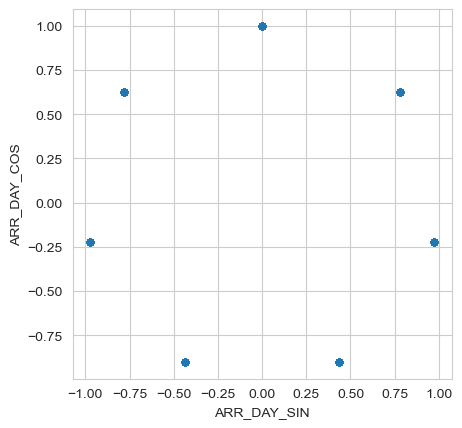

In [26]:
data = encode(data, "ARR_DAY", 7)
ax = data.plot.scatter('ARR_DAY_SIN', 'ARR_DAY_COS').set_aspect('equal')

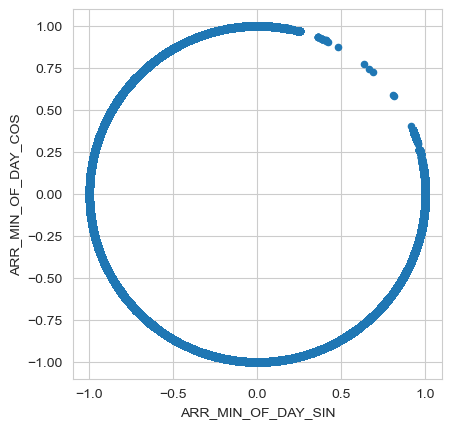

In [27]:
data = encode(data, "ARR_MIN_OF_DAY", 24 * 60)
ax = data.plot.scatter('ARR_MIN_OF_DAY_SIN', 'ARR_MIN_OF_DAY_COS').set_aspect('equal')

In [28]:
# Dropping the older values for the cyclic encoded columns
data = data.drop(["ARR_MIN_OF_DAY", "ARR_DAY"], axis=1)
data.head()

,OP_UNIQUE_CARRIER,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,PREV_FLIGHTS_1H,ARR_DELAY,Physical Class (Engine),Engines,Approach Speed(Vref),...,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS
5626534,-11.0,-8.0,-2,223,1590,4,-7,Jet,2,141,...,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.986286,-0.165048
5627321,-8.0,-8.0,-4,88,404,5,-11,Jet,2,126,...,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.982450,-0.186524
5622325,-8.0,-7.0,302,57,106,7,333,Jet,2,140,...,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.979925,-0.199368
5626430,-11.0,-9.0,-2,98,447,6,11,Jet,2,138,...,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.956305,-0.292372
5625623,-11.0,-9.0,-4,76,226,7,-8,Jet,2,139,...,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.945519,-0.325568


In [29]:
inchHg_to_pa(data["alti"])

5626534     101964.171383
5627321     101896.443604
5622325     101727.124156
5626430     101896.443604
5625623     101727.124156
                ...      
11291377    101862.579714
11292052    101862.579714
11290999    101862.579714
11290527    101862.579714
11290612    101862.579714
Name: alti, Length: 348140, dtype: float64

In [30]:
# Converting imperial units to metric units

F_cols = ["tmpf", "dwpf", "feel"]
knt_cols = ["sknt", "Approach Speed(Vref)"]
ft_cols = ["Wingspan, ft", "Length, ft", "Tail Height, ft(@ OEW)"]
mile_cols = ["DISTANCE"]
lb_cols = ["MTOW"]
sqft_cols = ["Parking Area (WS x Length), sf"]
inchHg_cols = ["alti"]

for col in F_cols:
    data[col] = F_to_C_deg(data[col])
for col in knt_cols:
    data[col] = knt_to_kmh(data[col])
for col in ft_cols:
    data[col] = ft_to_m(data[col])
for col in mile_cols:
    data[col] = mile_to_km(data[col])
for col in lb_cols:
    data[col] = lb_to_kg(data[col])
for col in sqft_cols:
    data[col] = sqft_to_sqm(data[col])
for col in inchHg_cols:
    data[col] = inchHg_to_pa(data[col])
data.head()

,OP_UNIQUE_CARRIER,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,PREV_FLIGHTS_1H,ARR_DELAY,Physical Class (Engine),Engines,Approach Speed(Vref),...,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS
5626534,-11.0,-8.0,-2,223,2558.85060,4,-7,Jet,2,261.132,...,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.986286,-0.165048
5627321,-8.0,-8.0,-4,88,650.17336,5,-11,Jet,2,233.352,...,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.982450,-0.186524
5622325,-8.0,-7.0,302,57,170.59004,7,333,Jet,2,259.280,...,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.979925,-0.199368
5626430,-11.0,-9.0,-2,98,719.37498,6,11,Jet,2,255.576,...,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.956305,-0.292372
5625623,-11.0,-9.0,-4,76,363.71084,7,-8,Jet,2,257.428,...,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.945519,-0.325568


In [31]:
# Create dummies for categorical columns
data = data.join(pd.get_dummies(data["Physical Class (Engine)"])).drop(["Physical Class (Engine)"],axis=1)
data = data.join(pd.get_dummies(data["Wingtip Configuration"])).drop(["Wingtip Configuration"],axis=1)
data.head()

,OP_UNIQUE_CARRIER,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,PREV_FLIGHTS_1H,ARR_DELAY,Engines,Approach Speed(Vref),"Wingspan, ft",...,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,Jet,Turboprop,no winglets,winglets,wingtip fences
5626534,-11.0,-8.0,-2,223,2558.85060,4,-7,2,261.132,34.314384,...,1.0,-0.781831,0.62349,0.986286,-0.165048,1,0,1,0,0
5627321,-8.0,-8.0,-4,88,650.17336,5,-11,2,233.352,34.101024,...,1.0,-0.781831,0.62349,0.982450,-0.186524,1,0,0,0,1
5622325,-8.0,-7.0,302,57,170.59004,7,333,2,259.280,20.930616,...,1.0,-0.781831,0.62349,0.979925,-0.199368,1,0,0,1,0
5626430,-11.0,-9.0,-2,98,719.37498,6,11,2,255.576,32.799528,...,1.0,-0.781831,0.62349,0.956305,-0.292372,1,0,0,1,0
5625623,-11.0,-9.0,-4,76,363.71084,7,-8,2,257.428,28.446984,...,1.0,-0.781831,0.62349,0.945519,-0.325568,1,0,1,0,0


In [32]:
# Fusing wingtip fences and winglets into one category
data["winglets"] = data["wingtip fences"] + data["winglets"]
# Dropping turboprop since a no on jet means yes on prop
data = data.drop(["Turboprop"], axis=1)
data = data.drop(["wingtip fences", "no winglets"], axis=1)
data.head()

,OP_UNIQUE_CARRIER,ORIGIN,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,PREV_FLIGHTS_1H,ARR_DELAY,Engines,Approach Speed(Vref),"Wingspan, ft",...,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,Jet,winglets
5626534,-11.0,-8.0,-2,223,2558.85060,4,-7,2,261.132,34.314384,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.986286,-0.165048,1,0
5627321,-8.0,-8.0,-4,88,650.17336,5,-11,2,233.352,34.101024,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.982450,-0.186524,1,1
5622325,-8.0,-7.0,302,57,170.59004,7,333,2,259.280,20.930616,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.979925,-0.199368,1,1
5626430,-11.0,-9.0,-2,98,719.37498,6,11,2,255.576,32.799528,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.956305,-0.292372,1,1
5625623,-11.0,-9.0,-4,76,363.71084,7,-8,2,257.428,28.446984,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.945519,-0.325568,1,0


In [33]:
# Standard naming for all columns
rename_dict = {
    "OP_UNIQUE_CARRIER" : "MEDIAN_CARR_DELAY(MINS)",
    "ORIGIN" : "MEDIAN_ORIGIN_DELAY(MINS)",
    "Jet": "JET(YN)",
    "no winglets": "WINGLETS(YN)",
    "CRS_ELAPSED_TIME": "CRS_ELAPSED_TIME(MINS)",
    "DISTANCE": "DISTANCE(KM)",
    "PREV_FLIGHTS_1H": "NR_PREV_ARR_FLIGHTS(1HR)",
    "Engines": "NR_ENGINES",
    "Approach Speed(Vref)": "APPROACH_SPEED(KMH)",
    "Wingspan, ft": "WINGSPAN(M)",
    "Length, ft": "LENGTH(M)",
    "Tail Height, ft(@ OEW)": "TAIL_HEIGHT(M)",
    "Parking Area (WS x Length), sf": "PARKING_AREA(SQM)",
    "Jet" : "JET(YN)",
    "winglets" : "WINGLETS(YN)",
    "MTOW": "MTOW(KG)",
    "tmpf": "TEMP(C)",
    "dwpf": "DEWPOINT_TEMP(C)",
    "relh": "REL_HUMIDITY(PERCENT)",
    "alti": "ALTIMETER(PA)",
    "drct": "WIND_DRCT(DEG)",
    "sknt": "WIND_SPEED(KMH)",
    "p01i": "1HOUR_PRECIPITATION(INCH)",
    "mslp": "SEA_LEVEL_PRESSURE(MILLIBAR)",
    "vsby": "VISIBILITY(MILES)",
    "feel": "FELT_TEMP(C)",
    "DEP_DELAY": "DEP_DELAY(MINS)",
    "ARR_DELAY": "ARR_DELAY_MINS"
}
data = data.rename(columns=rename_dict)
data.head()

,MEDIAN_CARR_DELAY(MINS),MEDIAN_ORIGIN_DELAY(MINS),DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DELAY_MINS,NR_ENGINES,APPROACH_SPEED(KMH),WINGSPAN(M),...,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,JET(YN),WINGLETS(YN)
5626534,-11.0,-8.0,-2,223,2558.85060,4,-7,2,261.132,34.314384,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.986286,-0.165048,1,0
5627321,-8.0,-8.0,-4,88,650.17336,5,-11,2,233.352,34.101024,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.982450,-0.186524,1,1
5622325,-8.0,-7.0,302,57,170.59004,7,333,2,259.280,20.930616,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.979925,-0.199368,1,1
5626430,-11.0,-9.0,-2,98,719.37498,6,11,2,255.576,32.799528,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.956305,-0.292372,1,1
5625623,-11.0,-9.0,-4,76,363.71084,7,-8,2,257.428,28.446984,...,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.945519,-0.325568,1,0


In [34]:
# Making the order of columns more convenient. (Thematically ordered)
cols = ['MEDIAN_CARR_DELAY(MINS)',
        'MEDIAN_ORIGIN_DELAY(MINS)', 
        'DEP_DELAY(MINS)',
        'CRS_ELAPSED_TIME(MINS)',
        'DISTANCE(KM)',
        'NR_PREV_ARR_FLIGHTS(1HR)',
        'ARR_DAY_SIN',
        'ARR_DAY_COS',
        'ARR_MIN_OF_DAY_SIN',
        'ARR_MIN_OF_DAY_COS',
        'NR_ENGINES',
        'APPROACH_SPEED(KMH)',
        'WINGSPAN(M)',
        'LENGTH(M)',
        'TAIL_HEIGHT(M)',
        'PARKING_AREA(SQM)',
        'MTOW(KG)',
        'JET(YN)',
        'WINGLETS(YN)',
        'TEMP(C)',
        'DEWPOINT_TEMP(C)',
        'FELT_TEMP(C)',
        'REL_HUMIDITY(PERCENT)',
        'WIND_DRCT(DEG)',
        'WIND_SPEED(KMH)',
        '1HOUR_PRECIPITATION(INCH)',
        'ALTIMETER(PA)',
        'SEA_LEVEL_PRESSURE(MILLIBAR)',
        'VISIBILITY(MILES)',
        'EVENT_BR',
        'EVENT_DZ',
        'EVENT_FG',
        'EVENT_FU',
        'EVENT_GR',
        'EVENT_GS',
        'EVENT_HZ',
        'EVENT_IC',
        'EVENT_RA',
        'EVENT_SN',
        'EVENT_TS',
        '08L/26R',
        '08R/26L',
        '09L/27R',
        '09R/27L',
        '10/28',
        'ARR_DELAY_MINS']

data = data[cols]
data

,MEDIAN_CARR_DELAY(MINS),MEDIAN_ORIGIN_DELAY(MINS),DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,...,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DELAY_MINS
5626534,-11.0,-8.0,-2,223,2558.85060,4,-0.781831,0.62349,0.986286,-0.165048,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-7
5627321,-8.0,-8.0,-4,88,650.17336,5,-0.781831,0.62349,0.982450,-0.186524,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-11
5622325,-8.0,-7.0,302,57,170.59004,7,-0.781831,0.62349,0.979925,-0.199368,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,333
5626430,-11.0,-9.0,-2,98,719.37498,6,-0.781831,0.62349,0.956305,-0.292372,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,11
5625623,-11.0,-9.0,-4,76,363.71084,7,-0.781831,0.62349,0.945519,-0.325568,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291377,-11.0,-9.0,-11,220,2811.51698,2,0.000000,1.00000,0.985556,-0.169350,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,-20
11292052,-11.0,-6.0,-2,264,3366.73928,2,0.000000,1.00000,0.977231,-0.212178,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,-26
11290999,-11.0,-5.0,-1,246,3133.38498,3,0.000000,1.00000,0.960050,-0.279829,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
11290527,-11.0,-11.0,-4,276,3442.37826,4,0.000000,1.00000,0.958820,-0.284015,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,-33


In [35]:
data.to_pickle(os.path.join(PREP_FOLDER, "07_integration.pkl"))